<a href="https://colab.research.google.com/github/eugemoris/Procesamiento_de_imagenes/blob/main/Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from PIL import Image,ImageFilter  
import matplotlib.pyplot as plt
import numpy as np

#inline

In [3]:
#matrices que nos permiten pasarnos a los distintos espacios vectoriales
RGB2YIQ= np.array([[0.299, 0.587, 0.114],
                [0.59590059, -0.27455667, -0.32134392],
                [0.21153661, -0.52273617, 0.31119955]])

YIQ2RGB= np.array([[1, 0.9663, 0.6210],
                [1, -0.2721, -0.6474],
                [1, -1.1070, 1.7046]])

In [4]:
def read_img(path):
    img = Image.open(path) 
    return img

def save_img(path,img):
    img = img.save(path)

def img2arr(img):
    img_arr = np.asarray(img)
    return img_arr

def arr2img(img_arr):
    img = Image.fromarray(np.uint8(img_arr))
    return img

def norm_Img(arrimg):
    arr_norm = arrimg/255
    return arr_norm

def rgb2yml(arr_img):
    result = np.dot(arr_img, RGB2YIQ)
    return result

def yiq2rgb(arr_img):
    OrigShape=arr_img.shape
    return np.dot(arr_img.reshape(-1,3), YIQ2RGB.transpose()).reshape(OrigShape)
    result = np.dot(arr_img * YIQ2RGB)
    #return result

def change_y(arr_img, alfa):
    arr_img[:,:,0] = arr_img[:,:,0] * alfa  
    return arr_img

def change_i(arr_img, beta):
    arr_img[:,:,1] = arr_img[:,:,1] * beta  
    return arr_img

def change_q(arr_img, beta):
    arr_img[:,:,2] = arr_img[:,:,2] * beta  
    return arr_img

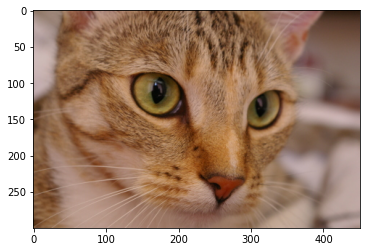

(300, 451, 3)


In [37]:
from skimage import data
cat = data.chelsea()

img = Image.fromarray(cat)
plt.imshow(img, cmap='inferno')
plt.show()


img_arr = img2arr(img)

#normalizo
arr_img = norm_Img(img_arr)
print(arr_img.shape)

#paso a YIQ
arr_img = rgb2yml(arr_img)



Y value - MAX:  6.800047123129412e-05 MIN:  1.2714381254117649e-06
I value - MAX:  0.02376011183995483 MIN:  -0.027898039542121424
Q value - MAX:  0.011944765220442351 MIN:  -0.0029086540695190603


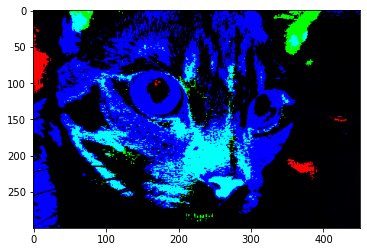

In [45]:
#@title This is the best graph you will see in your life {run:"auto"}

def plot(arr_img,alfa, beta):
  arr_img = change_y(arr_img,alfa)

  arr_img = change_i(arr_img,beta)

  arr_img = change_q(arr_img,beta)

  print('Y value - MAX: ', np.max(arr_img[:,:,0]), 'MIN: ', np.min(arr_img[:,:,0]))
  print('I value - MAX: ', np.max(arr_img[:,:,1]), 'MIN: ', np.min(arr_img[:,:,1]))
  print('Q value - MAX: ', np.max(arr_img[:,:,2]), 'MIN: ', np.min(arr_img[:,:,2]))

  arr_img = yiq2rgb(arr_img)

  arr_img = arr_img * 255

  img = arr2img(arr_img)
  plt.imshow(img, cmap='inferno')
  

alfa = 0.3 #@param {type:"slider", min:0, max:1, step:0.1}
beta = 0.7 #@param {type:"slider", min:0, max:1, step:0.1}

plot(arr_img,alfa,beta)